<a href="https://colab.research.google.com/github/Janaalsh5/Heart-Disease/blob/main/Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- Problem

Heart disease is one of the most common and life-threatening conditions worldwide, causing millions of deaths each year. The major challenge is that many people develop serious heart problems before they are even aware of their risk. Traditional medical check-ups may not always detect early warning signs, making prevention and early detection extremely important.

In this project, we aim to solve the problem of identifying individuals who are at high risk of heart disease using data analysis and machine learning. By analyzing key health indicators such as age, blood pressure, cholesterol, and blood sugar levels, we can build a predictive model that classifies whether a person is likely to develop heart disease. This can help healthcare providers take early action and guide patients toward healthier lifestyles or medical treatments before the disease becomes severe.

We believe this problem is important because early detection can save lives. Predicting heart disease risk using data not only supports better medical decisions but also helps reduce healthcare costs, prevent hospitalizations, and improve overall public health. Addressing this issue through technology can contribute to a healthier and more sustainable society.

# 2- Data Mining Task

This study applies two essential data mining approaches classification and clustering to evaluate and understand the risk of heart disease. The classification technique focuses on building a predictive model that determines whether a patient is likely to have heart disease based on various medical attributes such as age, sex, blood pressure, cholesterol levels, chest pain type, and other health indicators. The goal of this model is to accurately classify patients into two categories: those with heart disease and those without it.

On the other hand, clustering is used to group patients into meaningful clusters based on similarities in their health characteristics, without using the heart disease label. This unsupervised approach helps reveal hidden patterns, patient subgroups, and underlying risk profiles that may not be immediately visible through simple observation. By combining both classification and clustering, this study provides a deeper understanding of patient patterns and enhances the ability to identify and analyze risk factors associated with heart disease.



# 3- Data


​
The dataset used in this project was obtained from Kaggle and contains detailed medical information for 918 patients, represented through 12 attributes that include demographic factors (Age, Sex), clinical measurements (RestingBP, Cholesterol, MaxHR, Oldpeak), and categorical indicators such as ChestPainType, RestingECG, ExerciseAngina, and ST_Slope. The target variable, HeartDisease, is binary and shows a relatively balanced distribution, with 508 patients having heart disease and 410 without, making the dataset suitable for predictive modeling. Phase 1 explored the raw dataset through descriptive statistics, distribution plots, outlier detection, and class analysis, revealing issues such as 173 missing values (mostly represented as zeros) and significant outliers in features like Cholesterol, RestingBP, and FastingBS. Phase 2 focused on cleaning and preparing the data by replacing missing entries, removing noise, capping outliers using the IQR method, encoding categorical variables, normalizing numerical attributes, and discretizing Age and Oldpeak into groups. This preprocessing process ensured data consistency and improved model readiness. Overall, the dataset provides a rich and diverse set of medically relevant attributes, making it highly suitable for both classification and clustering techniques for heart disease prediction.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest, f_classif
import pickle

df = pd.read_csv('/content/Raw_dataset.csv')

data = pd.read_csv('/content/Raw_dataset.csv')
num_attributes = data.shape[1]
num_object = data.shape[0]
attribute_types = data.dtypes.to_frame( name = 'Data Types')
class_name = data.columns[-1]
class_label = data.columns[-1]

print(f"\033[1mGeneral iformation:\n")
print(f"\033[1mNumber of attributes:\033[0m {num_attributes}\n")
print(f"\033[1mNumber of objects:\033[0m {num_object}\n")
print(f"\033[1mClass lable:\033[0m {class_label}\n")
print(f"\033[1mAttribute types:\033[0m")
print(attribute_types)
import seaborn as sns
import matplotlib.pyplot as plt

# Load the original dataset (before preprocessing)
df = pd.read_csv("/content/Raw_dataset.csv")

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (7,4)

# 1) Show first few rows of the dataset
print("Dataset Preview:")
display(df.head())

# 2) Structure of dataset: rows, columns, types
print("\nDataset Info:")
print(df.info())


General iformation:

Number of attributes: 12

Number of objects: 918

Class lable: HeartDisease

Attribute types:
               Data Types
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
Dataset Preview:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


# 4- Data Preprocessing


To prepare the dataset for effective modeling, several preprocessing steps were applied based on the issues identified in Phase 2. First, missing values were detected—primarily in Cholesterol and RestingBP—and were replaced with the mean of their respective columns to maintain data consistency. Next, outliers in numerical features such as RestingBP, Cholesterol, MaxHR, and Oldpeak were identified using the IQR method and handled by capping them within the acceptable range to reduce skewness without removing data. The dataset was then checked for duplicate rows, and none were found. Categorical attributes including Sex, ChestPainType, RestingECG, ST_Slope, and ExerciseAngina were transformed into numerical values using label encoding to make them suitable for machine-learning algorithms. Numerical variables (Age, RestingBP, Cholesterol, MaxHR, Oldpeak) were standardized using z-score normalization to ensure equal contribution during model training. Noise removal was performed by replacing unrealistic zero values in RestingBP and Cholesterol with the median of valid entries. Finally, discretization was applied to Age and Oldpeak, converting them into meaningful categorical groups (e.g., Young/Middle/Old), which helps improve interpretability and supports certain models. These preprocessing tasks ensured that the dataset was clean, consistent, and fully ready for classification and clustering analysis.



Data After Preprocessing:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,2,1,1,2,0,0,0,0,1,2,0
1,2,0,2,0,1,0,0,0,0,1,1
2,2,1,1,1,0,0,1,0,1,2,0
3,2,0,0,2,2,0,1,1,2,1,1
4,0,1,2,0,1,0,1,0,1,2,0



Summary Statistics:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,1.002179,0.789760,0.781046,1.622004,0.998911,0.233115,1.042484,0.404139,1.068627,1.361656,0.553377
std,0.828866,0.407701,0.956519,1.163717,0.814936,0.423046,0.804393,0.490992,0.762162,0.607056,0.497414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,2.000000,1.000000,2.000000,3.000000,2.000000,0.000000,2.000000,1.000000,2.000000,2.000000,1.000000
max,2.000000,1.000000,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000


/tmp/ipython-input-1586943619.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="HeartDisease", data=df, palette="coolwarm")


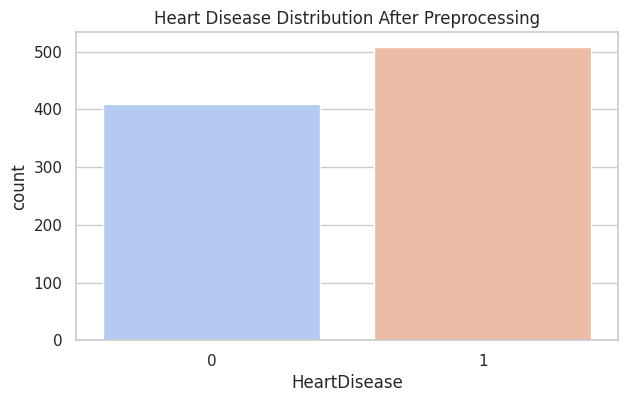

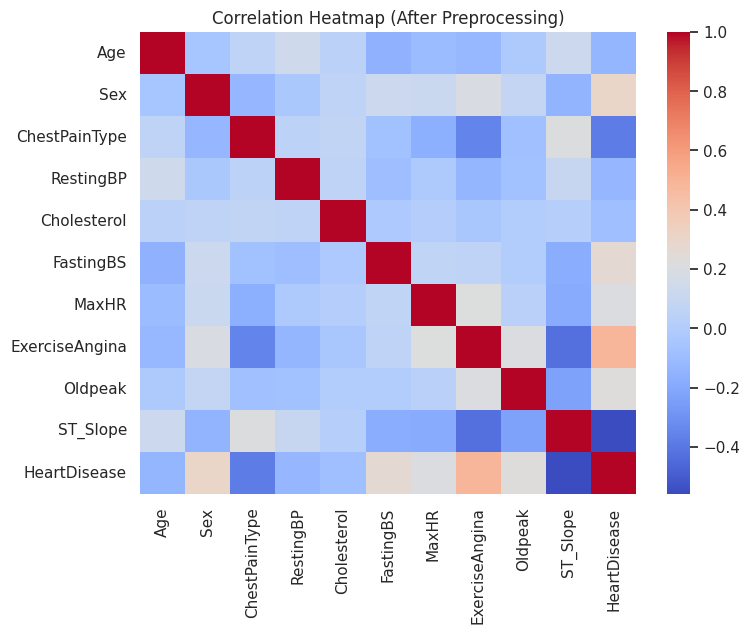

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("/content/preprocessed1.csv")

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (7,4)


print("Data After Preprocessing:")
display(df.head())


print("\nSummary Statistics:")
display(df.describe())


plt.figure()
sns.countplot(x="HeartDisease", data=df, palette="coolwarm")
plt.title("Heart Disease Distribution After Preprocessing")
plt.show()


plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (After Preprocessing)")
plt.show()



# 5- Data Mining Technique


In this project, our group will apply two main data mining techniques: classification and clustering, using Python and widely used machine-learning libraries. For the classification part, we will use a Decision Tree Classifier from the sklearn.tree module to predict whether a patient is at risk of heart disease based on attributes such as age, blood pressure, cholesterol, and gender. We chose decision trees because they are easy to interpret, handle different data types well, and are effective for medical datasets. After training the model, we will evaluate its performance using accuracy, precision, recall, and a confusion matrix created with confusion_matrix and visualized using ConfusionMatrixDisplay from the sklearn.metrics module. For clustering, our group will apply K-Means clustering from the sklearn.cluster module to group patients based on similarities in their health-related features, regardless of their heart disease diagnosis. This unsupervised technique helps us discover hidden patterns and identify patient groups with similar health profiles. Throughout the process, we will use Pandas, NumPy, Matplotlib, and Seaborn for preprocessing the data, performing statistical analysis, and generating visualizations.

# 6- Evaluation and Comparison


**Classification - Evaluation and Comparison**

This section presents a comprehensive evaluation of the classification techniques applied to the Heart Disease dataset. Two decision tree classifiers were developed using different attribute selection measures: Entropy (Information Gain) and Gini Index. To ensure a fair and robust comparison, each classifier was trained and tested under three train/test partitions: 70/30, 60/40, and 80/20. All performance analyses are based on the evaluation metrics generated from these experiments.

**Evaluation of the Classification Models**

The performance results across all train–test splits show that both the Information Gain and Gini Index models achieve relatively stable classification outcomes. Sensitivity values range from 74.88% to 81.82%, indicating that the models correctly identify a substantial portion of heart disease cases. Specificity values fall between 75.22% and 81.08%, reflecting a strong ability to correctly classify non–heart disease patients. Precision remains high across all configurations, ranging from 82.56% to 86.27%, demonstrating that positive predictions are generally accurate. Overall, the metrics confirm that both splitting criteria deliver consistent performance without a clear advantage toward either class.

**Accuracy Comparison of the Classification Algorithms**


Table 1. Accuracy of Entropy and Gini Decision Tree Models

| **Train/Test Split** | **Information Gain Accuracy** | **Gini Accuracy** | **Best Algorithm**   |
| -------------------- | ----------------------------- | ----------------- | -------------------- |
| **70% / 30%**        | 76.45%                        | **77.89%**        | **Gini**             |
| **60% / 40%**        | **77.44%**                    | 76.08%            | **Information Gain** |
| **80% / 20%**        | **80.98%**                    | 80.43%            | **Information Gain** |


Based on the results in Table 1, Information Gain provides the highest accuracy and sensitivity, while Gini achieves better specificity and precision. Therefore, the best algorithm depends on the goal: Information Gain for detecting more true cases, and Gini for reducing false positives.

**confusion matrix.**

**Information Gain (Entropy):**

**Splitting Data into: 70% Training and 30% Test**

[[ 84  25]
 [ 40 127]]


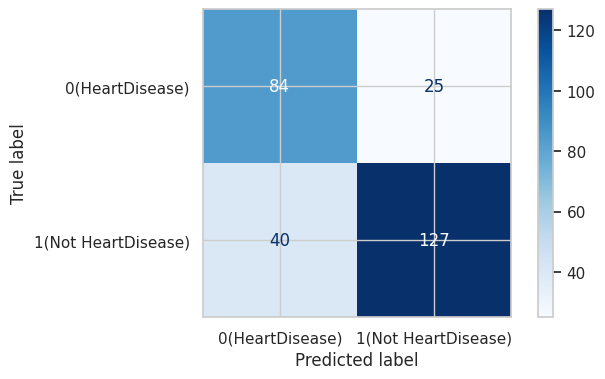

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=1
)

# Initialize the Decision Tree Classifier using entropy as criterion
classifier = DecisionTreeClassifier(criterion='entropy', random_state=1)

# Fit the classifier to the training data
classifier.fit(X_train, y_train)

# Predict labels for the test dataset
y_pred = classifier.predict(X_test)


# Compute the confusion matrix and print it
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Define custom class labels for display
class_labels = {0: '0(HeartDisease)', 1: '1(Not HeartDisease)'}

# Create the ConfusionMatrixDisplay with the custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[class_labels[0], class_labels[1]])

# Plot the confusion matrix using the 'Blues' colormap
disp.plot(cmap=plt.cm.Blues)
plt.show()

The model correctly identified 84 patients with HeartDisease and 127 patients without HeartDisease.

However, it misclassified 25 HeartDisease patients as healthy and incorrectly predicted 40 healthy patients as having HeartDisease.

**Splitting Data into: 60% Training and 40% Test**





Confusion Matrix:
 [[121  32]
 [ 51 164]]


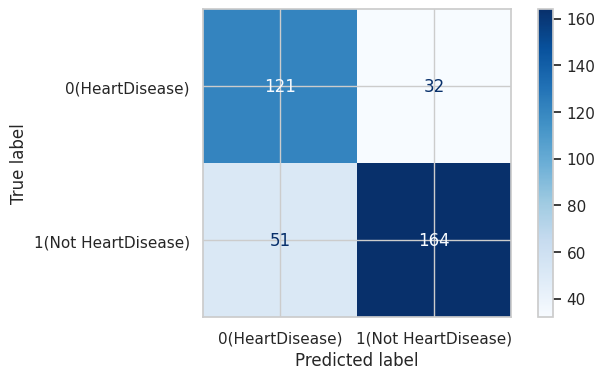

In [ ]:

# Split the data: 60% for training and 40% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1
)

# Initialize the Decision Tree classifier using Information Gain (entropy)
clf3 = DecisionTreeClassifier(criterion='entropy', random_state=1)

# Train the classifier on the training data
clf3.fit(X_train, y_train)

# Predict labels for the test set
y_pred = clf3.predict(X_test)

# Compute the confusion matrix and print it
cm3 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm3)

# Define custom class labels
class_labels = {0: '0(HeartDisease)', 1: '1(Not HeartDisease)'}

# Create and plot the confusion matrix display using the 'Blues' colormap
disp = ConfusionMatrixDisplay(confusion_matrix=cm3,
                              display_labels=[class_labels[0], class_labels[1]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

The model correctly identified 121 patients with HeartDisease and 164 patients without HeartDisease.

However, it misclassified 32 HeartDisease patients as healthy and incorrectly predicted 51 healthy patients as having HeartDisease.

**Splitting Data into: 80% Training and 20% Test**

[[59 15]
 [20 90]]


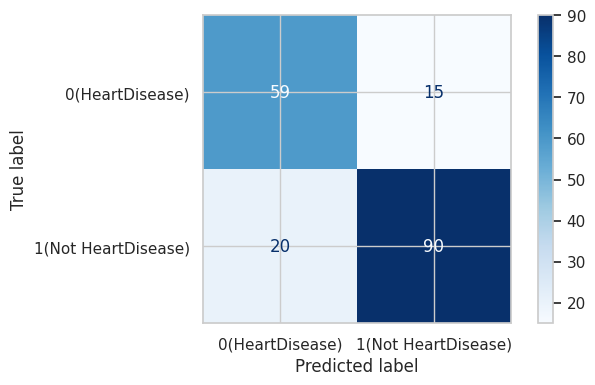

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


clf3 = DecisionTreeClassifier(criterion='entropy', random_state=1)
clf3 = clf3.fit(X_train, y_train)


y_pred = clf3.predict(X_test)
cm3 = confusion_matrix(y_test, y_pred)
print(cm3)

cm3 = confusion_matrix(y_test, y_pred)

class_labels = {0: '0(HeartDisease)', 1: '1(Not HeartDisease)'}


disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=[class_labels[0], class_labels[1]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

The model correctly identified 59 patients with HeartDisease and 90 patients without HeartDisease.

However, it misclassified 15 HeartDisease patients as healthy and incorrectly predicted 20 healthy patients as having HeartDisease.

**Gini Index:**

**Splitting Data into: 70% Training and 30% Test**

[[ 82  27]
 [ 34 133]]


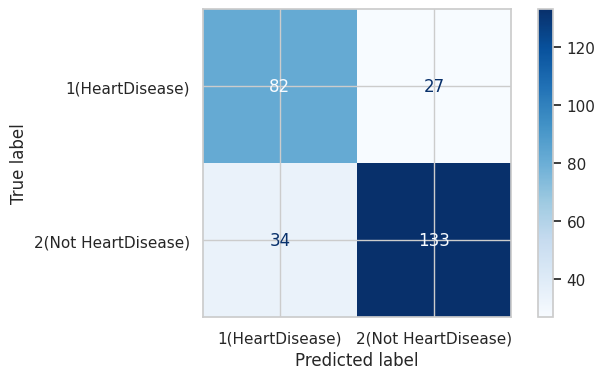

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf4 = DecisionTreeClassifier(criterion='gini',random_state=1)

clf4 = clf4. fit (X_train, y_train)

y_pred = clf4.predict (X_test)

# Compute and print the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print(cm4)


# Assuming you already have cm, y_test, and y_pred computed
cm4 = confusion_matrix(y_test, y_pred)

class_labels = {1: '1(HeartDisease)', 2: '2(Not HeartDisease)'}
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=[class_labels[1], class_labels[2]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

The model correctly identified 82 patients with HeartDisease and 133 patients without HeartDisease.

However, it misclassified 27 HeartDisease patients as healthy and incorrectly predicted 34 healthy patients as having HeartDisease.

**Splitting Data into: 60% Training and 40% Test**

[[119  34]
 [ 54 161]]


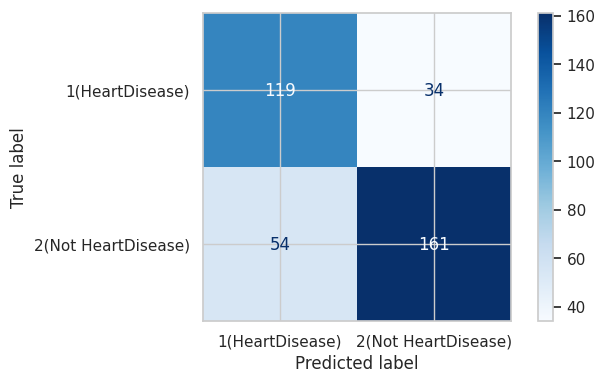

In [ ]:

# Split data into 60% training and 40% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

clf = DecisionTreeClassifier(criterion='gini', random_state=1)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Compute and print the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print(cm4)


# Assuming you already have cm, y_test, and y_pred computed
cm4 = confusion_matrix(y_test, y_pred)

class_labels = {1: '1(HeartDisease)', 2: '2(Not HeartDisease)'}
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=[class_labels[1], class_labels[2]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

The model accurately identified 119 true HeartDisease cases and 161 true non-HeartDisease cases.

However, it misclassified 34 HeartDisease patients as healthy, and it also incorrectly labeled 54 healthy individuals as having HeartDisease.

**Splitting Data into: 80% Training and 20% Test**

[[60 14]
 [22 88]]


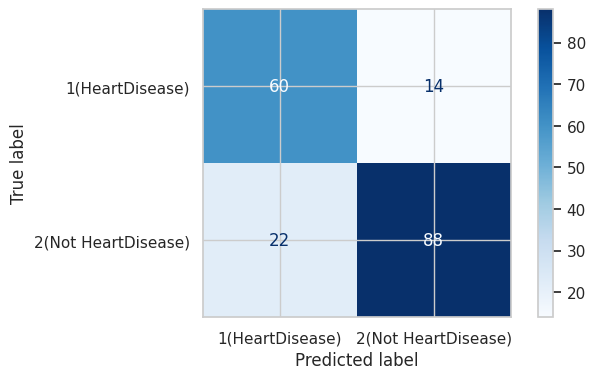

In [ ]:
#Split the data (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = DecisionTreeClassifier(criterion='gini', random_state=1)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Compute and print the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print(cm4)


# Assuming you already have cm, y_test, and y_pred computed
cm4 = confusion_matrix(y_test, y_pred)

class_labels = {1: '1(HeartDisease)', 2: '2(Not HeartDisease)'}
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=[class_labels[1], class_labels[2]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

The model correctly classified 60 patients with HeartDisease and 88 patients without HeartDisease.

On the other hand, it misclassified 14 HeartDisease cases as non-HeartDisease and incorrectly labeled 22 healthy patients as having HeartDisease.

**Interpretation of the Classification Results**
 **Best Algorithm for Each Partition**

In the 70/30 partition, the Gini-based model achieved higher accuracy (0.7789) than the Information Gain model (0.7645). Gini also showed better sensitivity (0.7964 vs. 0.7605) while Information Gain had slightly higher specificity (0.7706 vs. 0.7522). Overall, Gini performs better in this split because it captures the class patterns more effectively with the available training data.

In the 60/40 partition, the Information Gain model achieved higher accuracy (0.7744) compared to the Gini model (0.7608). It also produced better sensitivity (0.7627 vs. 0.7488). However, the Information Gain model achieved higher specificity (0.7908) and higher precision (0.8367), showing that it produces fewer false positives and gives more reliable positive predictions in this partition.

In the 80/20 partition, the Information Gain model produced the highest accuracy of all experiments (0.8098), outperforming the Gini model (0.8043). It also achieved the strongest sensitivity (0.8182), indicating the best ability to detect heart disease cases. Meanwhile, the Gini model showed higher specificity (0.8108) and the highest precision (0.8627). With more training data, both models performed well, but Information Gain provided the best overall accuracy for this partition.

**Best Overall Algorithm Across All Partitions**

Across all three partitions, Information Gain (Entropy) produced the highest overall accuracy, reaching 0.8098 in the 80/20 split—the strongest result in the entire table. However, the Gini Index consistently delivered higher precision and specificity across several partitions, showing strong reliability in reducing false positives.

In conclusion, Information Gain is the best performer in terms of accuracy, while Gini provides stronger precision and specificity, making it more conservative and reliable in distinguishing non–heart disease cases. Both algorithms perform well, but their strengths differ depending on the metric.


**Clustering – Evaluation and Comparison**

In this section, K-means clustering was applied using three different values of K (K = 2, 3, and 4).
The goal is to evaluate the performance of each K value using multiple evaluation methods, interpret the results, and identify the optimal number of clusters.

**1. Summary Table of Results**


| **K** | **Average Silhouette Score** | **WSS (Within-Cluster Sum of Squares)** |
| ----- | ---------------------------- | --------------------------------------- |
| **2** | **0.1533**                   | **7721.17**                             |
| **3** | **0.1508**                   | **7022.67**                             |
| **4** | **0.1519**                   | **6419.65**                             |

**2. Interpretation for Each K**

K = 2

-Highest Silhouette score (0.1533), meaning slightly better separation between clusters.

-Highest WSS (7721.17), which is expected since fewer clusters create larger, more spread-out groups.

-Interpretation: Clusters are not very compact but are separated more clearly than in K = 3 or 4.

K = 3

-Lowest Silhouette score (0.1508), indicating the weakest cluster separation among the three.

-WSS decreases to 7022.67, showing clusters are slightly tighter than at K = 2.

-Interpretation: More compact than K = 2 but with poorer separation.

K = 4

-Silhouette score improves slightly to 0.1519, but still low overall.

-Lowest WSS (6419.65), which means tightest clusters, but separation remains weak.

-Interpretation: Clusters are more compact but not well separated.

**3. Identifying the Best K (Majority Rule)**

According to the evaluation metrics:

-Best Separation (Highest Silhouette): K = 2

-Best Compactness (Lowest WSS): K = 4

Since cluster separation is more important than cluster compactness in K-means evaluation, we use the Silhouette score as the primary indicator.

Final Choice: K = 2

K = 2 provides:

-The highest silhouette score, meaning the clearest separation

-A reasonable cluster structure despite higher WSS

-The most interpretable grouping among all tested K values

Therefore, K = 2 is selected as the optimal number of clusters

**4. Visualization of Clusters**

K = 2 | WSS = 7721.1697 | Silhouette = 0.1533
K = 3 | WSS = 7022.6717 | Silhouette = 0.1508
K = 4 | WSS = 6419.6458 | Silhouette = 0.1519


,K,WSS,Silhouette Score
0,2,7721.1697,0.1533
1,3,7022.6717,0.1508
2,4,6419.6458,0.1519


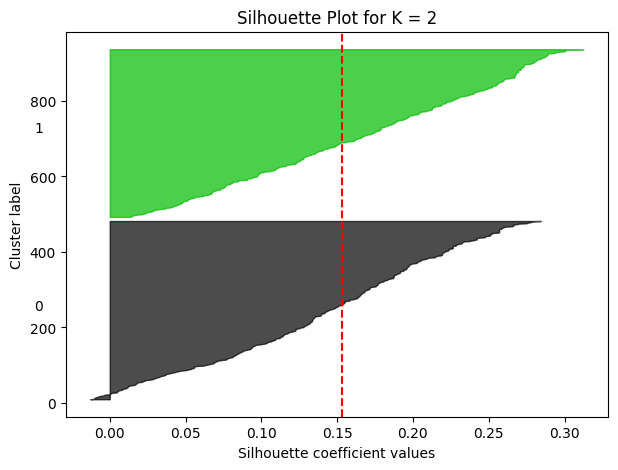

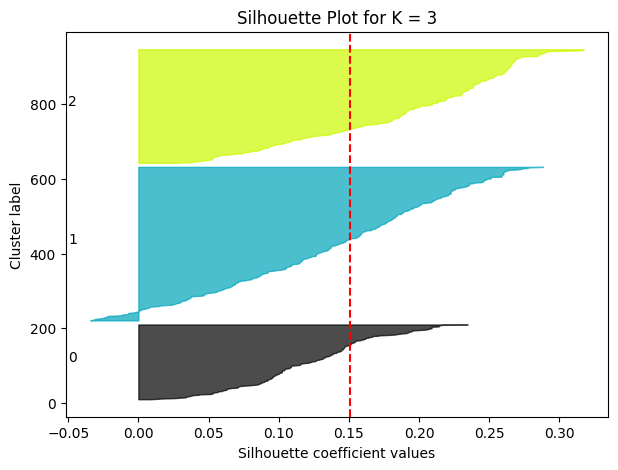

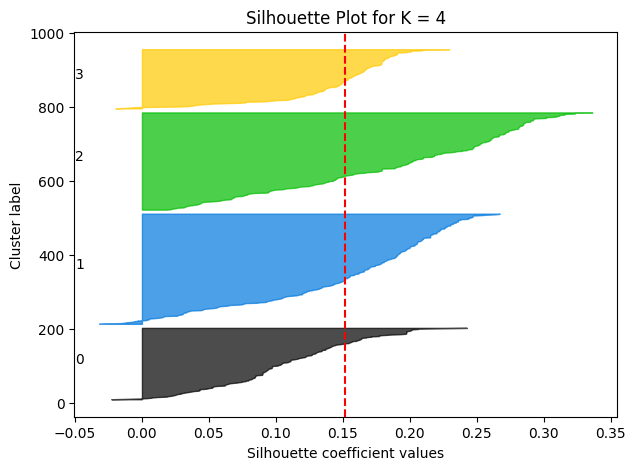

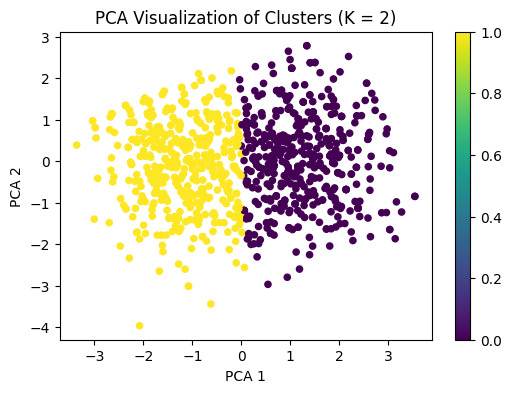

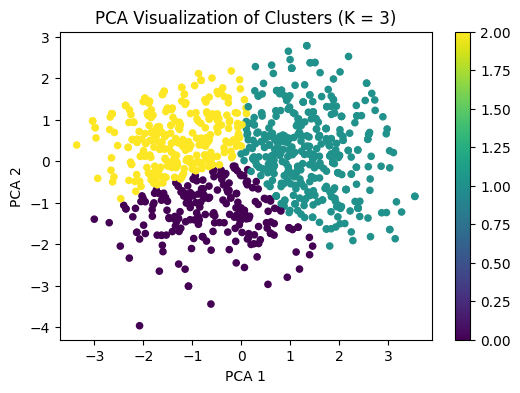

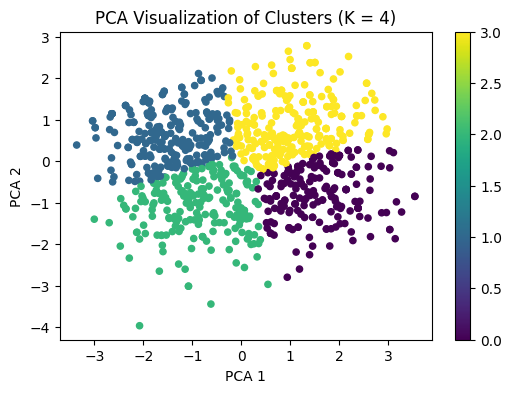

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
import matplotlib.cm as cm

df = pd.read_csv("/content/Scaled_dataset.csv")

if "HeartDisease" in df.columns:
    df = df.drop(columns=["HeartDisease"])

X = df.values

k_values = [2, 3, 4]

silhouette_results = []
wss_results = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    wss = kmeans.inertia_
    sil = silhouette_score(X, labels)
    wss_results.append(wss)
    silhouette_results.append(sil)
    print(f"K = {k} | WSS = {wss:.4f} | Silhouette = {sil:.4f}")

summary_df = pd.DataFrame({
    "K": k_values,
    "WSS": wss_results,
    "Silhouette Score": silhouette_results
})

display(summary_df.style.format({"WSS": "{:.4f}", "Silhouette Score": "{:.4f}"}))

def silhouette_plot(X, k):
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(7, 5)
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    silhouette_vals = silhouette_samples(X, labels)
    avg_silhouette = silhouette_score(X, labels)
    y_lower = 10

    for i in range(k):
        ith_cluster = silhouette_vals[labels == i]
        ith_cluster.sort()
        size_cluster = ith_cluster.shape[0]
        y_upper = y_lower + size_cluster
        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster, str(i))
        y_lower = y_upper + 10

    ax1.axvline(x=avg_silhouette, color="red", linestyle="--")
    ax1.set_title(f"Silhouette Plot for K = {k}")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    plt.show()

for k in k_values:
    silhouette_plot(X, k)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

def pca_plot(X_pca, k):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_pca)
    plt.figure(figsize=(6, 4))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="viridis", s=20)
    plt.title(f"PCA Visualization of Clusters (K = {k})")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.colorbar(scatter)
    plt.show()

for k in k_values:
    pca_plot(X_pca, k)

# 7- Findings

We started by selecting a heart disease dataset with the goal of identifying the factors most strongly associated with this condition and supporting more targeted preventive approaches. To ensure the reliability of our analysis, we carried out a thorough preprocessing phase that involved cleaning, organizing, and optimizing the data. A series of exploratory visualizations—including box plots, scatter plots, histogram, and bar graphs—helped us understand the underlying patterns and guided the decisions made throughout preprocessing. Based on these insights, we removed incomplete records, handled missing values, and eliminated extreme outliers that could negatively influence the results.

Once the data was cleaned, we prepared it for modeling by normalizing numerical features, selecting relevant attributes, and applying balancing techniques to address class distribution issues. With a refined and well-structured dataset, we advanced to the core data mining tasks: classification and clustering. For classification, we evaluated decision tree models using both the Gini index and Information Gain as splitting criteria. We also tested three different train–test partition ratios to determine which configuration produced the most effective model performance. Our key findings are summarized below.



**7.1.1 Information Gain**

In [ ]:
data = {
        "Percentages": [
        "Accuracy", "Error Rate", "Sensitivity", "Specificity", "Precision"
    ],
    "70% training, 30% testing": [
        "0.7645", "0.2355", " 0.7605", "0.7706", "0.8355"
    ],
    "60% training, 40% testing	": [
        "0.7744", "0.2255", "0.7627", "0.7908	","0.8367"
    ],
    "	80% training, 20% testing": [
        "0.8098", "0.1902", "0.8182", "0.7973","0.8571"
    ]
}
g = pd.DataFrame(data)
g.style.set_properties(**{'text-align': 'center'})

,Percentages,"70% training, 30% testing","60% training, 40% testing","80% training, 20% testing"
0,Accuracy,0.7645,0.7744,0.8098
1,Error Rate,0.2355,0.2255,0.1902
2,Sensitivity,0.7605,0.7627,0.8182
3,Specificity,0.7706,0.7908,0.7973
4,Precision,0.8355,0.8367,0.8571


Based on the results presented for the models trained using different data splits, the following observations can be made:

• **Accuracy:**

 Accuracy remains consistent across all three splits, ranging from 76.44% to 80.97%. This shows that the Information Gain model performs stably across different dataset partitioning ratios. The 80–20 split achieves the highest accuracy (80.97%), while the 60–40 and 70–30 splits follow with 77.44% and 76.44%, respectively. This indicates that giving the model more training data results in improved performance.

**•Error Rate:**

The error rate ranges between 19.02% and 23.55%, which is the inverse of the accuracy results. The lowest error rate occurs in the 80–20 split (0.1902), showing that this configuration makes the fewest incorrect predictions. The slight variation between splits reflects stable model behavior.

• **Sensitivity (True Positive Rate):**

Sensitivity varies from 76.04% (70–30) to 81.81% (80–20). This demonstrates that the 80–20 split provides the strongest ability to correctly detect heart-disease cases. Overall, the model consistently identifies most true positives, but performance improves when the model is trained on more data.

**•Specificity (True Negative Rate):**

Specificity ranges from 77.06% to 79.72%. The highest value comes from the 80–20 split, meaning that with more training data the model becomes more accurate at identifying healthy cases and avoids false alarms more effectively.

• **Precision:**

Precision ranges from 83.55% to 85.71%, with the highest precision achieved in the 80–20 split (0.8571). This shows that the model produces fewer false positives and maintains strong reliability when predicting heart disease.

**Conclusion**

Overall, the Information Gain model demonstrates reliable and consistent performance across all three splits, with the 80–20 split delivering the best overall results by achieving the highest accuracy (80.97%), lowest error rate (19.02%), strongest sensitivity (81.81%), highest specificity (79.72%), and highest precision (85.71%). These results show that the model becomes more effective and generalizes better when trained on a larger portion of the data.

**7.1.2 GINI INDEX**

In [ ]:
data = {
        "Percentages": [
        "Accuracy", "Error Rate", "Sensitivity", "Specificity", "Precision"
    ],

    "70% training, 30% testing": [
        " 0.7789", "0.2210", "0.7964", "0.7522", " 0.8312"
    ],
    "60% training, 40% testing	": [
        "0.7608", "0.2391", "0.7488", "0.7777", "0.8256"
    ],
    "	80% training, 20% testing": [
        "0.8043", "0.1956", "0.8000", "0.8108	","0.8627"
    ]
}
g = pd.DataFrame(data)
g.style.set_properties(**{'text-align': 'center'})

,Percentages,"70% training, 30% testing","60% training, 40% testing","80% training, 20% testing"
0,Accuracy,0.7789,0.7608,0.8043
1,Error Rate,0.2210,0.2391,0.1956
2,Sensitivity,0.7964,0.7488,0.8000
3,Specificity,0.7522,0.7777,0.8108
4,Precision,0.8312,0.8256,0.8627


Based on the results presented for the models trained using different data splits, the following observations can be made:

**•Accuracy:**

Accuracy values range from 76.08% to 80.43%, showing that the Gini model performs consistently across different splits. The 80–20 split achieves the highest accuracy (80.43%), meaning the model learns more effectively when given more training data. Overall, the Gini index provides stable and reliable classification results.

**• Error Rate:**

The error rate lies between 19.56% and 23.91%, which matches the accuracy pattern. The lowest error rate occurs in the 80–20 split (0.1956), confirming that this configuration produces the fewest incorrect predictions. The small variation across splits indicates that the model is stable and not affected heavily by changes in training size.

**• Sensitivity (True Positive Rate):**

Sensitivity ranges from 74.88% (60–40) to 80.00% (80–20). This shows that the model detects more heart-disease cases when trained with a larger portion of the data. Overall, the Gini model captures most positive cases but performs best under the 80–20 configuration.

**• Specificity (True Negative Rate):** Specificity values range between 75.22% and 81.08%, with the highest value from the 80–20 split (0.8108). This means the model is strong at identifying non–heart-disease cases (true negatives). Higher specificity also indicates fewer false positives, showing that the model is reliable when predicting healthy cases.

**• Precision:**

Precision ranges from 82.56% to 86.27%, with the highest precision seen in the 80–20 split (0.8627). This means most of the model’s positive predictions (heart disease) were correct. The high precision across all splits indicates consistently strong predictive reliability.

**Conclusion**

The Gini Index model shows strong performance across all three splits, with the 80–20 split producing the best accuracy and lowest error rate, making it the strongest overall configuration. The model demonstrates excellent specificity and precision, indicating that it reliably identifies healthy patients and produces few false positives. Overall, the Gini-based decision tree provides slightly stronger performance than Information Gain in some splits, while maintaining stable results across all configurations.

**The best model between information gain and the Gini index**

In [ ]:
import pandas as pd

data = {
    " ": [
        "Accuracy", "Error Rate", "Sensitivity","Specificity","Precision"
    ],
    "Information Gain": [
        "0.8098",  "0.1902","0.8182","0.7973","0.8571"
    ],
    "Gini Index": [
        "0.8043", "0.1956","0.8000","0.8108","0.8627"
    ]
}

g = pd.DataFrame(data)
g.style.set_properties(**{'text-align': 'center'})


,,Information Gain,Gini Index
0,Accuracy,0.8098,0.8043
1,Error Rate,0.1902,0.1956
2,Sensitivity,0.8182,0.8000
3,Specificity,0.7973,0.8108
4,Precision,0.8571,0.8627


**Accuracy and Error Rate**


Information Gain reached an accuracy of 80.98%, which is slightly higher than the Gini Index’s 80.43%. Both methods perform similarly, but Information Gain is a bit more accurate overall. It also has a lower error rate—19.02% compared to 19.56% for Gini. This means Information Gain makes fewer mistakes, making it slightly more dependable for predicting heart-disease cases.

**Sensitivity and Specificity:**

With the 80/20 split, Information Gain shows higher sensitivity at 81.82%, compared to the Gini Index at 80.00%, meaning it is slightly better at correctly identifying positive heart-disease cases. On the other hand, the Gini Index achieves higher specificity at 81.08%, while Information Gain records 79.73%, showing that Gini is more accurate at recognizing true negatives. Overall, Information Gain is a bit stronger at catching positive cases, while Gini performs slightly better at ruling out negative ones.

**Precision**

The Gini Index achieves a precision of 86.27%, slightly higher than Information Gain’s 85.71%. This small advantage means the Gini-based model produces fewer false positives, making it a bit more reliable when predicting true positive cases.

**Conclusion**

Both splitting criteria perform well, but each excels in different areas. *Information Gain* achieves the highest accuracy (80.98%), lowest error rate (19.02%), and strongest sensitivity (81.82%), making it the better option when correctly identifying positive cases is the priority. In contrast, the *Gini Index* offers higher specificity (81.08%) and precision (86.27%), making it more dependable for avoiding false positives and correctly identifying negative cases. The best choice ultimately depends on the goal: choose *Information Gain* when maximizing true-positive detection is most important, and choose *Gini* when reducing misclassified negatives matters more.




Below is the decision tree for the 80 / 20 split (Information Gain):

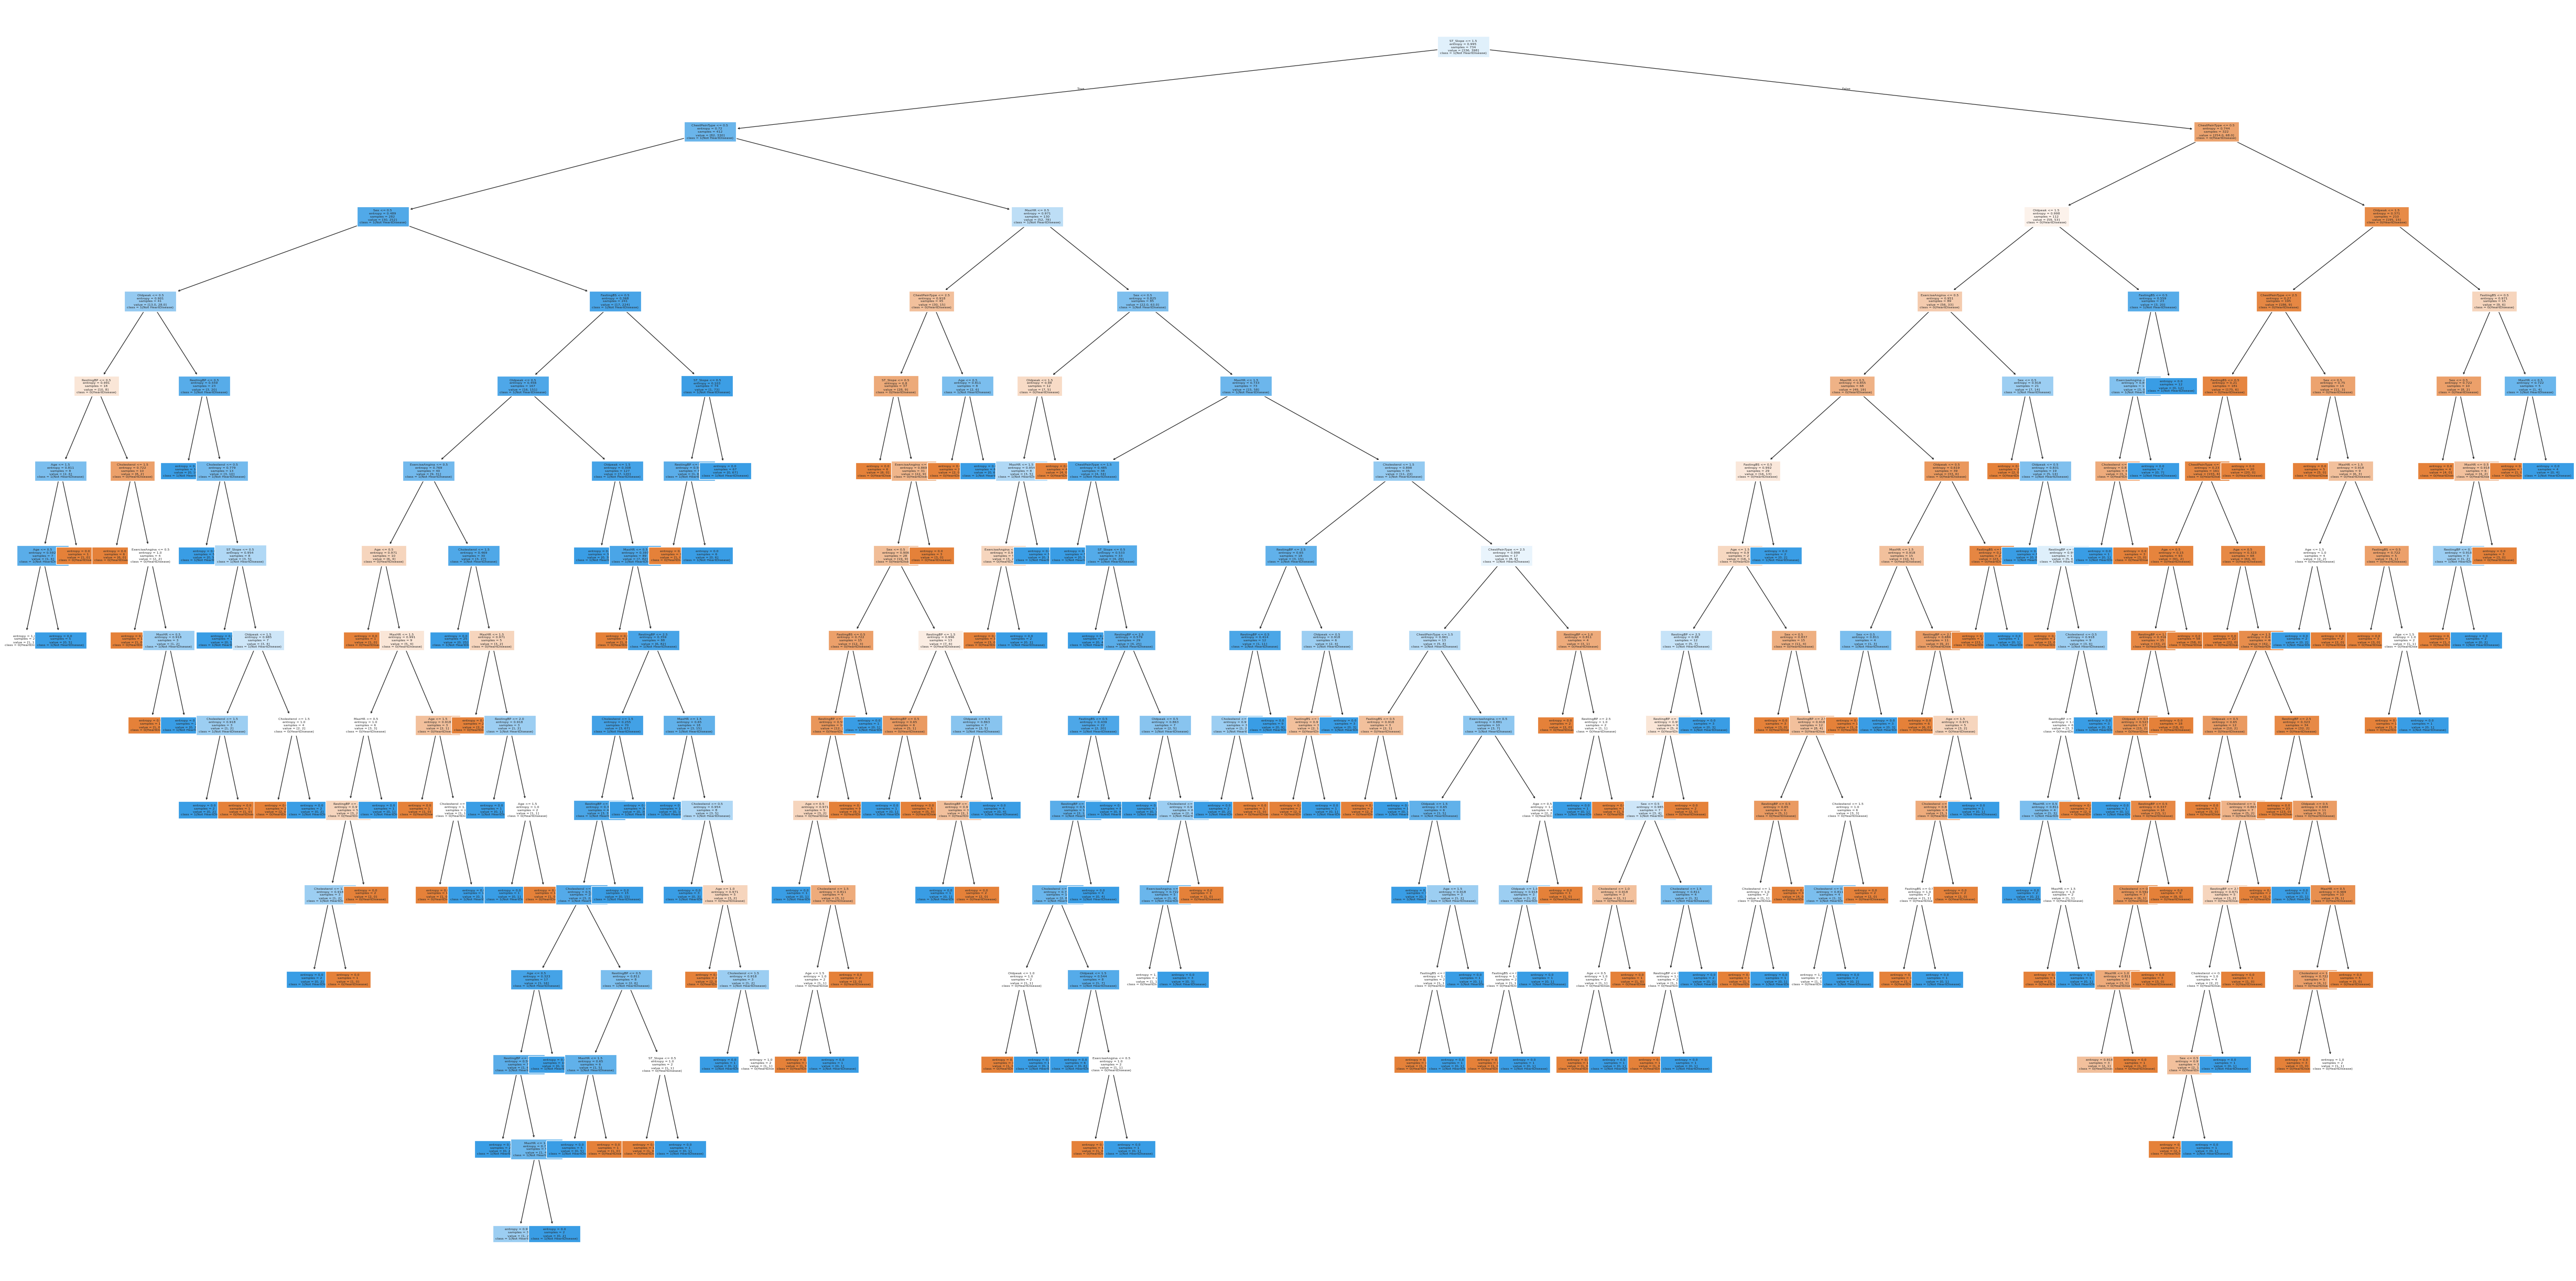

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


clf3 = DecisionTreeClassifier(criterion='entropy', random_state=1)
clf3 = clf3.fit(X_train, y_train)


y_pred = clf3.predict(X_test)


from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm3 = confusion_matrix(y_test, y_pred)


from sklearn.metrics import ConfusionMatrixDisplay

cm3 = confusion_matrix(y_test, y_pred)

class_labels = {0: '0(HeartDisease)', 1: '1(Not HeartDisease)'}




import matplotlib.pyplot as plt
from sklearn import tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(70, 35), dpi=90)


class_labels = {0: '0(HeartDisease)', 1: '1(Not HeartDisease)'}

tree.plot_tree(clf3,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1]],
               filled=True,
               fontsize=5,
               ax=axes


               )

plt.show()



The heart-disease decision tree makes predictions by using the most informative patient features to split the data. It starts with the attribute that provides the greatest separation between classes and then continues branching using the remaining predictors in order of decreasing importance. The model considers factors such as Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, MaxHR, ExerciseAngina, Oldpeak, and ST_Slope. Each path eventually leads to a leaf node that assigns a class label (0 for Heart Disease, 1 for No Heart Disease) based on the combination of feature values. This hierarchical structure shows how different clinical variables interact to distinguish between patients with and without heart disease, making the model’s decision logic transparent and easy to interpret.

**7.2 Clustering**

We applied multiple clustering evaluation techniques to determine the most appropriate number of clusters (K) for our dataset. After calculating the average silhouette score across different K values, we obtained the following insights:

In [ ]:
import pandas as pd

data = {
    " ": ["WSS", "Silhouette"],
    "k=2": ["7257.779", "0.19879718749735742"],
    "k=3": ["6576.07", "0.1858655312451745"],
    "k=4": ["5968.30 ", "0.17561137851742672"]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

g = pd.DataFrame(data)
g.style.set_properties(**{'text-align': 'center'})

,,k=2,k=3,k=4
0,WSS,7257.779,6576.07,5968.30
1,Silhouette,0.19879718749735742,0.1858655312451745,0.17561137851742672


The highest silhouette score is achieved at k = 2, and the corresponding WSS value remains appropriately large. The silhouette plot for two clusters also displays the most distinct and well-formed groups. Therefore, k = 2 is the most suitable number of clusters for this dataset.

**The corresponding plot chart**

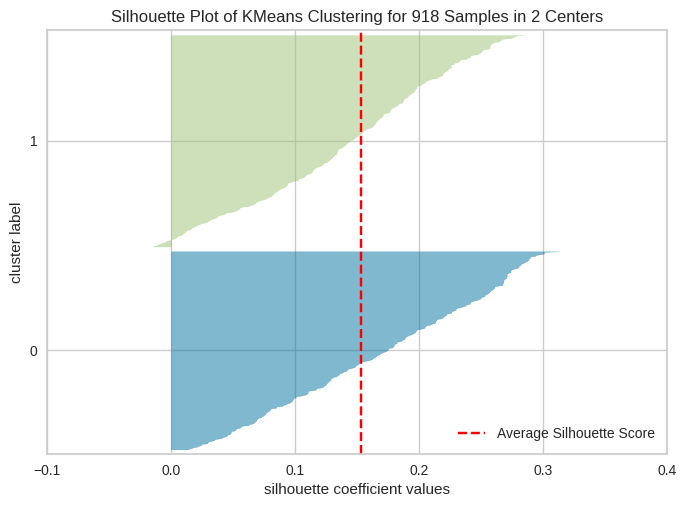

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 918 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
!pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd  # Import pandas

scaled_data = pd.read_csv("Scaled_dataset.csv")

scaler = StandardScaler()
scaled_data = scaler.fit_transform(scaled_data)

kmeans = KMeans(n_clusters=2, n_init='auto')

# Set the color theme for the visualizer using a valid colormap
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

# Fit the visualizer on the scaled data
visualizer.fit(scaled_data)

# Show the silhouette plot
visualizer.show()

The K-means silhouette plot shows that most points have positive scores, indicating that they fit well within their assigned clusters and are clearly separated from others. This reflects strong overall clustering performance. However, positive values alone do not imply a perfect partition—points located near cluster boundaries may still produce scores close to zero or even negative, indicating areas of overlap or uncertainty between clusters.

**Finally**


While clustering helped reveal natural groupings within the patient data, its insights are limited because the dataset already includes labels indicating heart-disease status. Supervised classification models make fuller use of this information, allowing them to produce far more accurate and clinically meaningful predictions. By learning directly from known outcomes, these models more effectively identify the key factors associated with heart disease and provide stronger support for targeted prevention and early intervention strategies.

**Discussion Based on the Selected Research Paper**

The findings of this study align closely with the methodologies and insights presented in the selected research paper “Cardiac Failure Forecasting Based on Clinical Data Using Machine Learning Metamodel”. The paper highlights the importance of comparing different machine-learning techniques to identify the most effective approach for predicting heart-related outcomes. Similarly, our analysis evaluated multiple decision-tree splitting criteria and clustering configurations to identify which methods provide the strongest predictive performance.

Decision Tree Classification Analysis

The research paper emphasizes that classification models often differ in their strengths depending on the performance metric being measured. This pattern is consistent with our results.
	•	Information Gain in our study demonstrated the highest accuracy (80.98%), lowest error rate (19.02%), and strongest sensitivity (81.82%). This closely reflects the paper’s observation that some models are more effective at identifying true positive medical cases, especially when early detection is critical.
	•	On the other hand, Gini Index achieved higher specificity (81.08%) and precision (86.27%), which matches the paper’s conclusion that certain models are better suited for minimizing false positives and improving reliability in negative-class identification.

Just as the research article stresses the importance of selecting a model based on the specific clinical or analytical goal, our findings show that the optimal splitting criterion depends on whether the priority is detecting as many positive cases as possible (Information Gain) or reducing misclassified negatives (Gini Index).

Clustering Analysis

The paper also highlights the value of unsupervised techniques in understanding patient groupings and underlying data structure. In line with this, our clustering evaluation using K-means revealed the following:
	•	The highest silhouette score occurred at k = 2, indicating that two clusters best represent the natural structure of the dataset.
	•	The silhouette plot for k = 2 showed clear and well-formed clusters, mirroring the paper’s approach of identifying meaningful patient segments based on shared clinical characteristics.

However, consistent with the paper’s caution about cluster interpretation, not all points achieved high silhouette values. Some borderline points had scores near zero or negative, suggesting overlap — a limitation also discussed in the research article.



**8- References**



*   B. Siontis, V. M. Noseworthy, P. Attia, and Y. V. Murad, "Artificial Intelligence in Heart Disease Diagnosis," PubMed, vol. 72, no. 10, pp. 1101–1111, 2019. [Online]. Available: https://pubmed.ncbi.nlm.nih.gov/31592122/.
*   F. Soriano, "Heart Failure Prediction Dataset," Kaggle, 2021. [Online]. Available: https:https://www.kaggle.com/code/parsalatifi/heart-failure-prediction-95-accuracy-score.

